In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [2]:
#reading data into a data frame to analyze
df=pd.read_csv('https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true')

In [3]:
#taking a first look at the data
df

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0
...,...,...,...,...,...,...,...,...,...,...,...
48837,b. 31-40,e. High,b. Mid,a. = 0,b. Mid,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,test,0
48838,b. 31-40,b. Mid - Low,a. Low,a. = 0,b. Mid,b. 9-12,b. Mid,a. no income,c. 31-35 & 61-70,test,0
48839,d. 41-50 & 61-70,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,test,0
48840,b. 31-40,b. Mid - Low,a. Low,c. > 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,test,0


# Perform Data Quality Analysis

In [4]:
#initial data quality check to see if any columns have null values and gathering insights on data type
#observation: there are no missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  48842 non-null  object
 1   occupation_bin      48842 non-null  object
 2   msr_bin             48842 non-null  object
 3   capital_gl_bin      48842 non-null  object
 4   race_sex_bin        48842 non-null  object
 5   education_num_bin   48842 non-null  object
 6   education_bin       48842 non-null  object
 7   workclass_bin       48842 non-null  object
 8   age_bin             48842 non-null  object
 9   flag                48842 non-null  object
 10  y                   48842 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 4.1+ MB


In [5]:
#importing AutoViz to help with EDA
!pip install autoviz
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


In [6]:
#Autoviz provided me with insights on the data in this df
AV.AutoViz(df)

Shape of your Data Set loaded: (48842, 11)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  8
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  2
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    11 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
To fix these data quality issues in the dataset, import FixDQ from autoviz...
There are 4001

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
hours_per_week_bin,object,0.000000,0,,,No issue
occupation_bin,object,0.000000,0,,,No issue
msr_bin,object,0.000000,0,,,No issue
capital_gl_bin,object,0.000000,0,,,No issue
race_sex_bin,object,0.000000,0,,,No issue
education_num_bin,object,0.000000,0,,,No issue
education_bin,object,0.000000,0,,,No issue
workclass_bin,object,0.000000,0,,,No issue
age_bin,object,0.000000,0,,,No issue
flag,object,0.000000,0,,,No issue


All Plots done
Time to run AutoViz = 20 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0
...,...,...,...,...,...,...,...,...,...,...,...
48837,b. 31-40,e. High,b. Mid,a. = 0,b. Mid,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,test,0
48838,b. 31-40,b. Mid - Low,a. Low,a. = 0,b. Mid,b. 9-12,b. Mid,a. no income,c. 31-35 & 61-70,test,0
48839,d. 41-50 & 61-70,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,test,0
48840,b. 31-40,b. Mid - Low,a. Low,c. > 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,test,0


# Display descriptive statistics for each column

In [5]:
#gathering descriptive statistics on the data. Since the data is primarily categorical, count, unique, top, and freq are the most important to look at
df.describe(include="all")

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
count,48842,48842,48842,48842,48842,48842,48842,48842,48842,48842,48842.000000
unique,5,5,3,3,3,5,5,2,5,2,NaN
top,b. 31-40,c. Mid - Mid,c. High,a. = 0,c. High,b. 9-12,b. Mid,b. income,e. 40-55,train,NaN
freq,26639,13971,22047,42525,29737,30324,30324,46012,13963,32561,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.239282
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.426649
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [6]:
#this code provides insights into the frequency of each category. We can see which values in each column are the the most or least commom
for col in df.columns:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())


Column: hours_per_week_bin
hours_per_week_bin
b. 31-40            26639
d. 41-50 & 61-70     9819
a. 0-30              7851
e. 51-60             3759
c. 71-100             774
Name: count, dtype: int64

Column: occupation_bin
occupation_bin
c. Mid - Mid     13971
b. Mid - Low     12947
e. High          12258
a. Low            7237
d. Mid - High     2429
Name: count, dtype: int64

Column: msr_bin
msr_bin
c. High    22047
b. Mid     15868
a. Low     10927
Name: count, dtype: int64

Column: capital_gl_bin
capital_gl_bin
a. = 0    42525
c. > 0     4035
b. < 0     2282
Name: count, dtype: int64

Column: race_sex_bin
race_sex_bin
c. High    29737
b. Mid     16457
a. Low      2648
Name: count, dtype: int64

Column: education_num_bin
education_num_bin
b. 9-12    30324
c. 13       8025
a. 0-8      6408
d. 14       2657
e. 15+      1428
Name: count, dtype: int64

Column: education_bin
education_bin
b. Mid          30324
c. Bachelors     8025
a. Low           6408
d. Masters       2657
e. High  

In [7]:
#generating more insightul descriptive statistics that show meaningful metrics for categorical values

def generate_descriptive_stats(df):
    summary_stats = pd.DataFrame({
        "Column": df.columns,
        "Unique Values": df.nunique().values,
        "Most Frequent Value (Mode)": [df[col].mode()[0] for col in df.columns],
        "Mode Frequency": [df[col].value_counts().iloc[0] for col in df.columns],
        "Mode %": [df[col].value_counts().iloc[0] / len(df) * 100 for col in df.columns],
        "Data Type": df.dtypes.values
    })
    return summary_stats

generate_descriptive_stats(df)



,Column,Unique Values,Most Frequent Value (Mode),Mode Frequency,Mode %,Data Type
0,hours_per_week_bin,5,b. 31-40,26639,54.541174,object
1,occupation_bin,5,c. Mid - Mid,13971,28.604480,object
2,msr_bin,3,c. High,22047,45.139429,object
3,capital_gl_bin,3,a. = 0,42525,87.066459,object
4,race_sex_bin,3,c. High,29737,60.884075,object
5,education_num_bin,5,b. 9-12,30324,62.085910,object
6,education_bin,5,b. Mid,30324,62.085910,object
7,workclass_bin,2,b. income,46012,94.205806,object
8,age_bin,5,e. 40-55,13963,28.588100,object
9,flag,2,train,32561,66.665984,object


# Generating Data Quality Report

In [8]:
#for numerical features
numerical_report = df.describe().transpose()
numerical_report["Missing Values"] = df.isnull().sum()
numerical_report["Missing %"] = (df.isnull().sum() / len(df)) * 100
numerical_report["Cardinality"] = df.nunique()

numerical_report = numerical_report.reset_index().rename(columns={"index": "Feature"})
numerical_report

,Feature,count,mean,std,min,25%,50%,75%,max,Missing Values,Missing %,Cardinality
0,y,48842.0,0.239282,0.426649,0.0,0.0,0.0,0.0,1.0,0,0.0,2


In [9]:
#for categorical features
def generate_categorical_report(df):
    categorical_columns = df.select_dtypes(include=["object"]).columns
    summary_stats = pd.DataFrame({
        "Unique Values": df[categorical_columns].nunique().values,
        "Most Frequent Value (Mode)": [df[col].mode()[0] for col in categorical_columns],
        "Mode Frequency": [df[col].value_counts().iloc[0] for col in categorical_columns],
        "Mode %": [df[col].value_counts().iloc[0] / len(df) * 100 for col in categorical_columns],
        "Missing Values": df[categorical_columns].isnull().sum().values,
        "Missing %": (df[categorical_columns].isnull().sum() / len(df)) * 100
    })
    return summary_stats

categorical_report = generate_categorical_report(df)
categorical_report

,Unique Values,Most Frequent Value (Mode),Mode Frequency,Mode %,Missing Values,Missing %
hours_per_week_bin,5,b. 31-40,26639,54.541174,0,0.0
occupation_bin,5,c. Mid - Mid,13971,28.604480,0,0.0
msr_bin,3,c. High,22047,45.139429,0,0.0
capital_gl_bin,3,a. = 0,42525,87.066459,0,0.0
race_sex_bin,3,c. High,29737,60.884075,0,0.0
education_num_bin,5,b. 9-12,30324,62.085910,0,0.0
education_bin,5,b. Mid,30324,62.085910,0,0.0
workclass_bin,2,b. income,46012,94.205806,0,0.0
age_bin,5,e. 40-55,13963,28.588100,0,0.0
flag,2,train,32561,66.665984,0,0.0


# Performing necessary data transformations

In [10]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
#encoding ordinal cateogirical variables

# Define the ordinal columns
ordinal_columns = [
    'hours_per_week_bin',
    'msr_bin',
    'education_num_bin',
    'education_bin',
    'age_bin'
]

# Updated ordinal_categories, including 'e. High' for education_bin
ordinal_categories = [
    ['a. 0-30', 'b. 31-40', 'd. 41-50 & 61-70', 'e. 51-60', 'c. 71-100'],  # hours_per_week_bin
    ['a. Low', 'b. Mid', 'c. High'],                                           # msr_bin
    ['a. 0-8', 'b. 9-12', 'c. 13', 'd. 14', 'e. 15+'],                       # education_num_bin
    ['a. Low', 'b. Mid', 'c. Bachelors', 'd. Masters', 'e. High'],             # education_bin (updated)
    ['a. 0-25', 'b. 26-30 & 71-100', 'c. 31-35 & 61-70', 'd. 36-40 & 56-60', 'e. 40-55']  # age_bin
]

# Initialize the OrdinalEncoder with the updated category orders
encoder = OrdinalEncoder(categories=ordinal_categories)

# Make a copy of the DataFrame and encode the ordinal columns
df_encoded = df.copy()
df_encoded[ordinal_columns] = encoder.fit_transform(df_encoded[ordinal_columns])

# Display the first few rows of the encoded ordinal columns
print("Encoded ordinal columns:")
print(df_encoded[ordinal_columns].head())




Encoded ordinal columns:
   hours_per_week_bin  msr_bin  education_num_bin  education_bin  age_bin
0                 1.0      1.0                2.0            2.0      3.0
1                 0.0      2.0                2.0            2.0      4.0
2                 1.0      1.0                1.0            1.0      3.0
3                 1.0      2.0                0.0            0.0      4.0
4                 1.0      2.0                2.0            2.0      1.0


In [11]:
#encoding nominal categorical variables
from sklearn.preprocessing import OneHotEncoder
onehot_columns = ['occupation_bin', 'capital_gl_bin', 'race_sex_bin', 'workclass_bin']

# Initialize and apply the OneHotEncoder
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
onehot_array = ohe.fit_transform(df_encoded[onehot_columns])

# Convert the one-hot encoded array to a DataFrame
onehot_df = pd.DataFrame(onehot_array, columns=ohe.get_feature_names_out(onehot_columns),
                         index=df_encoded.index)

# Drop the original one-hot columns and merge the new one-hot columns into df_encoded
df_encoded.drop(columns=onehot_columns, inplace=True)
df_encoded = pd.concat([df_encoded, onehot_df], axis=1)

# Display the first few rows of the final encoded dataframe
print("Final encoded DataFrame:")
print(df_encoded.head())

Final encoded DataFrame:
   hours_per_week_bin  msr_bin  education_num_bin  education_bin  age_bin  \
0                 1.0      1.0                2.0            2.0      3.0   
1                 0.0      2.0                2.0            2.0      4.0   
2                 1.0      1.0                1.0            1.0      3.0   
3                 1.0      2.0                0.0            0.0      4.0   
4                 1.0      2.0                2.0            2.0      1.0   

    flag  y  occupation_bin_a. Low  occupation_bin_b. Mid - Low  \
0  train  0                    0.0                          1.0   
1  train  0                    0.0                          0.0   
2  train  0                    1.0                          0.0   
3  train  0                    1.0                          0.0   
4  train  0                    0.0                          0.0   

   occupation_bin_c. Mid - Mid  occupation_bin_d. Mid - High  \
0                          0.0               

In [12]:
# splitting data into test and train based on flag column
df_train = df_encoded[df_encoded["flag"] == "train"].drop(columns=["flag"])
df_test = df_encoded[df_encoded["flag"] == "test"].drop(columns=["flag"])

# look at first rows
print(df_train.head())
print(df_test.head())

   hours_per_week_bin  msr_bin  education_num_bin  education_bin  age_bin  y  \
0                 1.0      1.0                2.0            2.0      3.0  0   
1                 0.0      2.0                2.0            2.0      4.0  0   
2                 1.0      1.0                1.0            1.0      3.0  0   
3                 1.0      2.0                0.0            0.0      4.0  0   
4                 1.0      2.0                2.0            2.0      1.0  0   

   occupation_bin_a. Low  occupation_bin_b. Mid - Low  \
0                    0.0                          1.0   
1                    0.0                          0.0   
2                    1.0                          0.0   
3                    1.0                          0.0   
4                    0.0                          0.0   

   occupation_bin_c. Mid - Mid  occupation_bin_d. Mid - High  \
0                          0.0                           0.0   
1                          0.0                  

In [13]:
#ensuring all variables are in numerical data type
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32561 entries, 0 to 32560
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   hours_per_week_bin            32561 non-null  float64
 1   msr_bin                       32561 non-null  float64
 2   education_num_bin             32561 non-null  float64
 3   education_bin                 32561 non-null  float64
 4   age_bin                       32561 non-null  float64
 5   y                             32561 non-null  int64  
 6   occupation_bin_a. Low         32561 non-null  float64
 7   occupation_bin_b. Mid - Low   32561 non-null  float64
 8   occupation_bin_c. Mid - Mid   32561 non-null  float64
 9   occupation_bin_d. Mid - High  32561 non-null  float64
 10  occupation_bin_e. High        32561 non-null  float64
 11  capital_gl_bin_a. = 0         32561 non-null  float64
 12  capital_gl_bin_b. < 0         32561 non-null  float64
 13  capita

In [14]:
# Define Features (X) and Target (y) for Training and Test Sets
X_train = df_train.drop(columns=["y"])  # Training Features
y_train = df_train["y"]                 # Training Target

X_test = df_test.drop(columns=["y"])    # Test Features
y_test = df_test["y"]                   # Test Target


In [15]:
print(X_train.head())
print(y_train.head())

   hours_per_week_bin  msr_bin  education_num_bin  education_bin  age_bin  \
0                 1.0      1.0                2.0            2.0      3.0   
1                 0.0      2.0                2.0            2.0      4.0   
2                 1.0      1.0                1.0            1.0      3.0   
3                 1.0      2.0                0.0            0.0      4.0   
4                 1.0      2.0                2.0            2.0      1.0   

   occupation_bin_a. Low  occupation_bin_b. Mid - Low  \
0                    0.0                          1.0   
1                    0.0                          0.0   
2                    1.0                          0.0   
3                    1.0                          0.0   
4                    0.0                          0.0   

   occupation_bin_c. Mid - Mid  occupation_bin_d. Mid - High  \
0                          0.0                           0.0   
1                          0.0                           0.0   
2 

# Builidng RandomForest Classifier





Note: you will need to clear the Autoviz cells before you run the bottom two cells to make sure the graphs from EDA are not being displayed

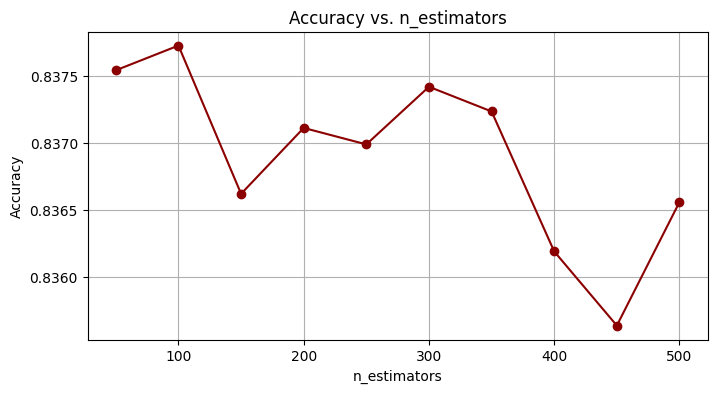

In [16]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

# Ensure plots appear inline if you're using a Jupyter environment
%matplotlib inline

# Range of n_estimators to test
n_estimators_values = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

accuracy_results = []
auc_results = []

for n in n_estimators_values:
    # Create the model with current n_estimators, keep other hyperparameters at defaults
    model = RandomForestClassifier(n_estimators=n, random_state=42)

    # Fit on training data (X_train, y_train)
    model.fit(X_train, y_train)

    # Predict on test data
    y_pred = model.predict(X_test)

    # Calculate Accuracy
    acc = accuracy_score(y_test, y_pred)
    accuracy_results.append(acc)

    # Calculate AUC (using predicted probabilities for the positive class)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    auc_val = roc_auc_score(y_test, y_pred_proba)
    auc_results.append(auc_val)


# Plot Accuracy vs. n_estimators
plt.figure(figsize=(8,4))
plt.plot(n_estimators_values, accuracy_results, marker='o', color='darkred')
plt.title('Accuracy vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


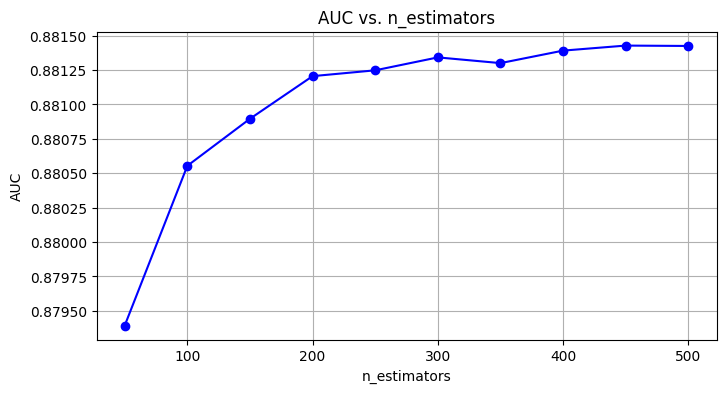

In [17]:

# Plot AUC vs. n_estimators
plt.figure(figsize=(8,4))
plt.plot(n_estimators_values, auc_results, marker='o', color='blue')
plt.title('AUC vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('AUC')
plt.grid(True)
plt.show()

In [18]:
# Print the best n_estimators for Accuracy
best_index_acc = np.argmax(accuracy_results)
best_n_estimators_acc = n_estimators_values[best_index_acc]
print("Best n_estimators for Accuracy:", best_n_estimators_acc,
      "with Accuracy =", accuracy_results[best_index_acc])

Best n_estimators for Accuracy: 100 with Accuracy = 0.8377249554695657


In [19]:
# Print the best n_estimators for AUC
best_index_auc = np.argmax(auc_results)
best_n_estimators_auc = n_estimators_values[best_index_auc]
print("Best n_estimators for AUC:", best_n_estimators_auc,
      "with AUC =", auc_results[best_index_auc])

Best n_estimators for AUC: 450 with AUC = 0.8814282736166705


Conclusion:
1. Write your observations about the Classifier’s behavior with respect to the number of estimators

*   The Accuracy metric fluctuates slightly as n_estimators increases. It does not show a strict increasing or decreasing trend; instead, it goes up or down by small margins.Overall, the Accuracy stays roughly between 0.836 and 0.838, indicating that adding more estimators neither dramatically improves nor harms performance.
*   The AUC metric generally increases with the number of estimators, at least until it reaches a plateau.Adding more trees usually improves the model’s stability and predictive power, but the gains become marginal after a certain point.

2. Is there an optimal value of the estimator within the given range
*   If you rely strictly on Accuracy,the n_estimators value that yielded the highest point on the Accuracy plot would be n=50 or n=200.
*   If the goal is to maximize AUC then a larger n_estimators should be used because the AUC curve seems to peak or plateau around those values.



# Building AdaBoost

In [20]:
from sklearn.ensemble import AdaBoostClassifier
%matplotlib inline

# Range of n_estimators
n_estimators_values = [50,100,150,200,250,300,350,400,450,500]

ada_accuracy_results = []
ada_auc_results = []

for n in n_estimators_values:
    model = AdaBoostClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    ada_accuracy_results.append(acc)

    # Predict probabilities for AUC
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    auc_val = roc_auc_score(y_test, y_pred_proba)
    ada_auc_results.append(auc_val)






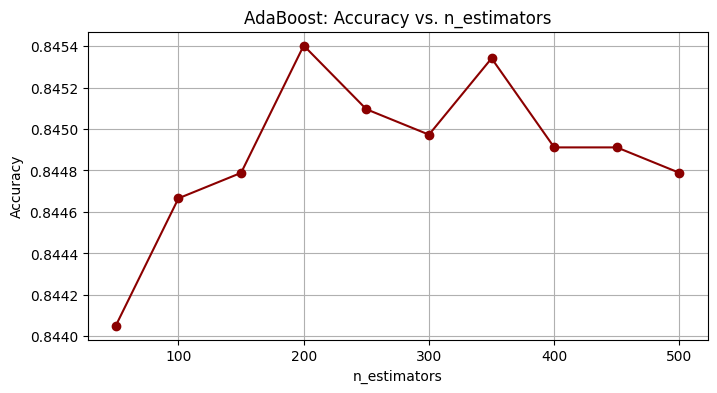

In [21]:
# Plot Accuracy vs. n_estimators
plt.figure(figsize=(8,4))
plt.plot(n_estimators_values, ada_accuracy_results, marker='o', color='darkred')
plt.title('AdaBoost: Accuracy vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

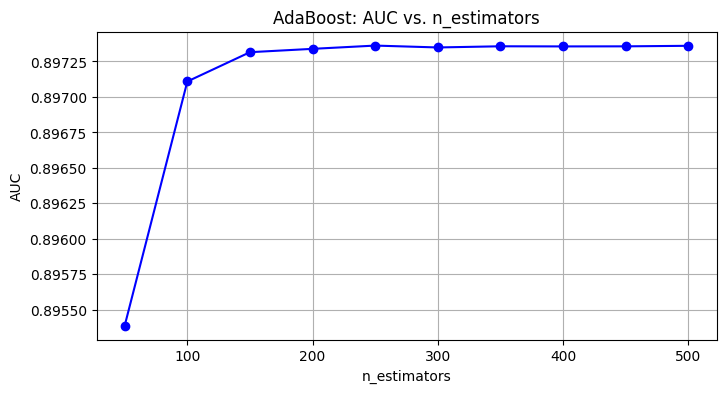

In [22]:
# Plot AUC vs. n_estimators
plt.figure(figsize=(8,4))
plt.plot(n_estimators_values, ada_auc_results, marker='o', color='blue')
plt.title('AdaBoost: AUC vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('AUC')
plt.grid(True)
plt.show()

In [23]:

# Identify best n_estimators for Accuracy
best_index_acc = np.argmax(ada_accuracy_results)
best_n_estimators_acc = n_estimators_values[best_index_acc]
print("AdaBoost - Best n_estimators for Accuracy:", best_n_estimators_acc,
      "with Accuracy =", ada_accuracy_results[best_index_acc])

# Identify best n_estimators for AUC
best_index_auc = np.argmax(ada_auc_results)
best_n_estimators_auc = n_estimators_values[best_index_auc]
print("AdaBoost - Best n_estimators for AUC:", best_n_estimators_auc,
      "with AUC =", ada_auc_results[best_index_auc])

AdaBoost - Best n_estimators for Accuracy: 200 with Accuracy = 0.8454026165468952
AdaBoost - Best n_estimators for AUC: 250 with AUC = 0.8973622169655584


#  Builidng Gradient Boost

In [24]:
from sklearn.ensemble import GradientBoostingClassifier


%matplotlib inline

n_estimators_values = [50,100,150,200,250,300,350,400,450,500]

gb_accuracy_results = []
gb_auc_results = []

for n in n_estimators_values:
    model = GradientBoostingClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    gb_accuracy_results.append(acc)

    y_pred_proba = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None
    if y_pred_proba is not None:
        y_pred_proba = y_pred_proba[:, 1]
        auc_val = roc_auc_score(y_test, y_pred_proba)
    else:
        # If the model doesn't have predict_proba (some older versions), skip or handle differently
        auc_val = float('nan')
    gb_auc_results.append(auc_val)



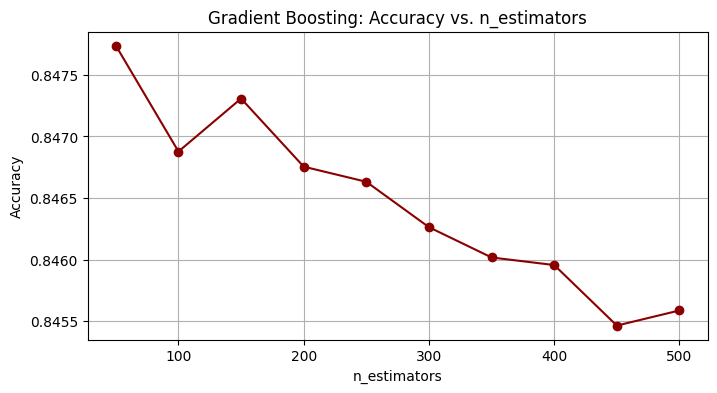

In [25]:
# Plot Accuracy
plt.figure(figsize=(8,4))
plt.plot(n_estimators_values, gb_accuracy_results, marker='o', color='darkred')
plt.title('Gradient Boosting: Accuracy vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

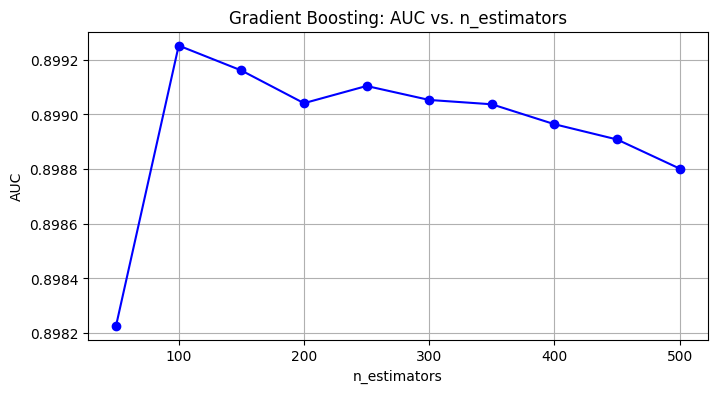

In [26]:
# Plot AUC
plt.figure(figsize=(8,4))
plt.plot(n_estimators_values, gb_auc_results, marker='o', color='blue')
plt.title('Gradient Boosting: AUC vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('AUC')
plt.grid(True)
plt.show()

In [27]:
# Identify best n_estimators for Accuracy
best_index_acc = np.argmax(gb_accuracy_results)
best_n_estimators_acc = n_estimators_values[best_index_acc]
print("Gradient Boosting - Best n_estimators for Accuracy:", best_n_estimators_acc,
      "with Accuracy =", gb_accuracy_results[best_index_acc])
# Identify best n_estimators for AUC
best_index_auc = np.argmax(gb_auc_results)
best_n_estimators_auc = n_estimators_values[best_index_auc]
print("Gradient Boosting - Best n_estimators for AUC:", best_n_estimators_auc,
      "with AUC =", gb_auc_results[best_index_auc])

Gradient Boosting - Best n_estimators for Accuracy: 50 with Accuracy = 0.8477366255144033
Gradient Boosting - Best n_estimators for AUC: 100 with AUC = 0.8992517095134951


# Builidng XGB Classifier

In [28]:
#clean out special characters so that the XGB classifier can process data
def clean_column_names(df):
    df.columns = [
        col
          .replace('[','_')
          .replace(']','_')
          .replace('<','_lt_')
          .replace('>','_gt_')
          .replace(' ','_')
          .replace('&','_')
          .replace('.','')
        for col in df.columns
    ]
    return df

df_train = clean_column_names(df_train)
df_test = clean_column_names(df_test)

In [29]:
#reassigning cleaned data back to variables
X_train = df_train.drop(columns=["y"])
y_train = df_train["y"]
X_test = df_test.drop(columns=["y"])
y_test = df_test["y"]

In [30]:
from xgboost import XGBClassifier

%matplotlib inline

n_estimators_values = [50,100,150,200,250,300,350,400,450,500]

xgb_accuracy_results = []
xgb_auc_results = []

for n in n_estimators_values:
    model = XGBClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    xgb_accuracy_results.append(acc)

    y_pred_proba = model.predict_proba(X_test)[:, 1]
    auc_val = roc_auc_score(y_test, y_pred_proba)
    xgb_auc_results.append(auc_val)

print("Accuracy:", xgb_accuracy_results)
print("AUC:", xgb_auc_results)

/usr/local/lib/python3.11/dist-packages/cudf/utils/_ptxcompiler.py:64: UserWarning: Error getting driver and runtime versions:

stdout:



stderr:

Traceback (most recent call last):
  File "<string>", line 4, in <module>
  File "/usr/local/lib/python3.11/dist-packages/numba_cuda/numba/cuda/cudadrv/driver.py", line 314, in __getattr__
    raise CudaSupportError("Error at driver init: \n%s:" %
numba.cuda.cudadrv.error.CudaSupportError: Error at driver init: 

CUDA driver library cannot be found.
If you are sure that a CUDA driver is installed,
try setting environment variable NUMBA_CUDA_DRIVER
with the file path of the CUDA driver shared library.
:


Not patching Numba
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cudf/utils/gpu_utils.py:62: UserWarning: Failed to dlopen libcuda.so.1
  warnings.warn(str(e))


Accuracy: [0.8460782507217002, 0.8449112462379461, 0.8431914501566243, 0.8422087095387262, 0.8422087095387262, 0.8421472882501075, 0.8413488114980652, 0.8409188624777347, 0.8412873902094465, 0.8411031263435906]
AUC: [np.float64(0.8965197916320352), np.float64(0.8946178369852928), np.float64(0.8931267552270246), np.float64(0.8919203780616042), np.float64(0.8909351404212983), np.float64(0.8902875085650793), np.float64(0.8897091709965141), np.float64(0.8890784340661926), np.float64(0.8885282407677488), np.float64(0.8880857526219023)]


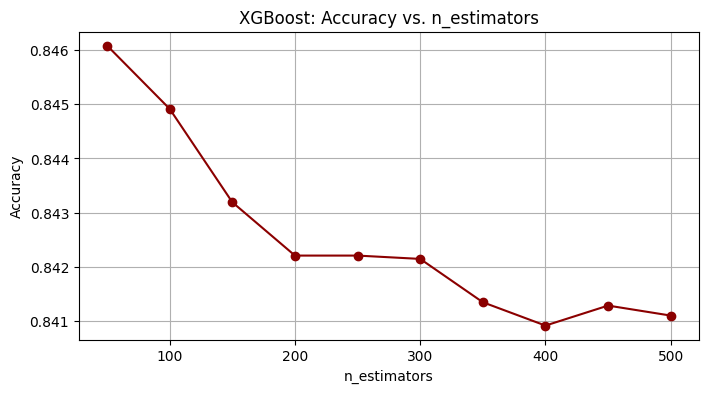

In [31]:
#plot accuracy vs n_estimators
plt.figure(figsize=(8,4))
plt.plot(n_estimators_values, xgb_accuracy_results, marker='o', color='darkred')
plt.title('XGBoost: Accuracy vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

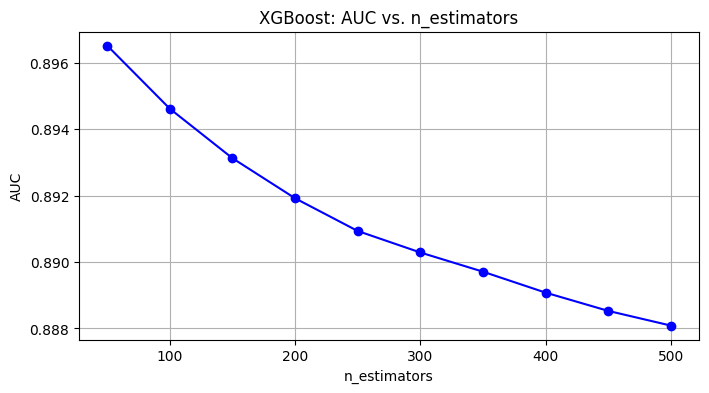

In [32]:
# Plot AUC vs. n_estimators
plt.figure(figsize=(8,4))
plt.plot(n_estimators_values, xgb_auc_results, marker='o', color='blue')
plt.title('XGBoost: AUC vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('AUC')
plt.grid(True)
plt.show()

In [33]:
# Identify best n_estimators for Accuracy
best_index_acc = np.argmax(xgb_accuracy_results)
best_n_estimators_acc = n_estimators_values[best_index_acc]
print("Gradient Boosting - Best n_estimators for Accuracy:", best_n_estimators_acc,
      "with Accuracy =", xgb_accuracy_results[best_index_acc])
# Identify best n_estimators for AUC
best_index_auc = np.argmax(xgb_auc_results)
best_n_estimators_auc = n_estimators_values[best_index_auc]
print("Gradient Boosting - Best n_estimators for AUC:", best_n_estimators_auc,
      "with AUC =", xgb_auc_results[best_index_auc])

Gradient Boosting - Best n_estimators for Accuracy: 50 with Accuracy = 0.8460782507217002
Gradient Boosting - Best n_estimators for AUC: 50 with AUC = 0.8965197916320352


# Comparing Performance

In [34]:
# putting best scores in one place
rf_best_acc = 0.8377249554695657
rf_best_auc = 0.8814282736166705

# AdaBoost best scores
ada_best_acc = 0.8454026165468952
ada_best_auc = 0.8973622169655584

# Gradient Boost best scores
gb_best_acc =  0.8477366255144033
gb_best_auc = 0.8992517095134951

# XGBoost best scores
xgb_best_acc = .8460782507217002
xgb_best_auc = 0.8965197916320352


In [35]:
model_results = {
    'Random Forest': [rf_best_acc, rf_best_auc],
    'AdaBoost':       [ada_best_acc, ada_best_auc],
    'Gradient Boost': [gb_best_acc, gb_best_auc],
    'XGB':            [xgb_best_acc, xgb_best_auc]
}

# Rows are Accuracy and AUC
df_results = pd.DataFrame(model_results, index=['Accuracy','AUC'])

print(df_results)

          Random Forest  AdaBoost  Gradient Boost       XGB
Accuracy       0.837725  0.845403        0.847737  0.846078
AUC            0.881428  0.897362        0.899252  0.896520


Conclusion: Gradient Boosting achieved the highest Accuracy (0.8477) and also the highest AUC (0.8993), indicating it performed best among the four models under the tested hyperparameter settings